# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import pearsonr

# Input Data

In [2]:
df = pd.read_csv("/content/app store-revisi.csv")

In [3]:
df.head()

,app_id,app_name,category,size_in_mb,installs,rating,reviews,app_version,last_updated
0,1,Lotstring,Books And Reference,123,500000,3.9,63261,4.25,2016-01-31
1,2,Temp,Social,216,500000000,2.1,17137,0.52,2016-10-10
2,3,Y-find,Finance,207,10,4.7,84761,1.0.1,2017-09-10
3,4,Zaam-Dox,Tools,185,100,3.4,89944,0.6.8,2019-09-30
4,5,Cardify,Books And Reference,59,5000000,1.5,71623,1.8.6,2017-02-15


# Data Pre-processing
Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_id        82 non-null     int64  
 1   app_name      82 non-null     object 
 2   category      82 non-null     object 
 3   size_in_mb    82 non-null     int64  
 4   installs      82 non-null     int64  
 5   rating        82 non-null     float64
 6   reviews       82 non-null     int64  
 7   app_version   82 non-null     object 
 8   last_updated  82 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 5.9+ KB


In [5]:
df.isnull().sum()

app_id          0
app_name        0
category        0
size_in_mb      0
installs        0
rating          0
reviews         0
app_version     0
last_updated    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,app_id,size_in_mb,installs,rating,reviews
count,82.000000,82.000000,8.200000e+01,82.000000,82.000000
mean,78.780488,133.414634,1.093104e+08,2.958537,46841.926829
std,78.317023,70.310239,2.898634e+08,1.195563,29272.795814
min,1.000000,4.000000,0.000000e+00,1.000000,243.000000
25%,22.250000,63.750000,5.000000e+01,2.100000,17737.500000
50%,55.000000,138.000000,1.000000e+04,3.000000,48828.500000
75%,116.250000,198.250000,5.000000e+06,3.775000,69660.500000
max,484.000000,246.000000,1.000000e+09,5.000000,98112.000000


# Analysing the data

1. aplikasi dengan size terbesar?:

In [8]:
top_size = df.sort_values('size_in_mb', ascending=False)[["app_name","size_in_mb"]]
top_size

,app_name,size_in_mb
66,Namfix,246
16,Stim,243
42,Zathin,240
61,Opela,237
69,Fintone,235
...,...,...
57,Tampflex,23
22,Fix San,22
58,Bitchip,21
39,Ventosanzap,9


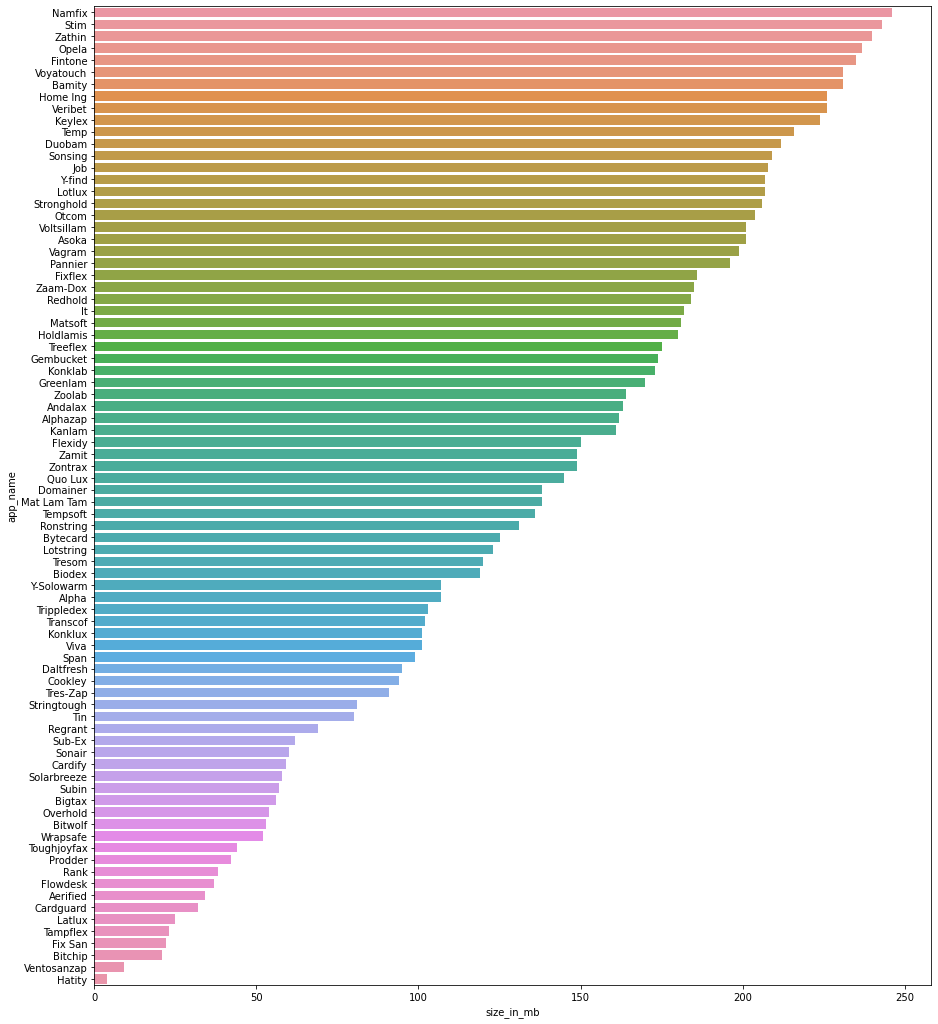

In [9]:
plt.figure(figsize=(15,18))
sns.barplot(data=top_size, y='app_name', x='size_in_mb')

2. kategori terpopuler ?

In [10]:
group_category = df.groupby('category').sum().reset_index()
group_category
top_category = group_category.sort_values('installs', ascending=False)[["category","installs"]]
top_categories = top_category.head(10)
top_categories

,category,installs
17,Maps And Navigation,2060015100
20,Parenting,1100550000
8,Events,1050100000
24,Shopping,1000551000
1,Auto And Vehicles,1000505050
5,Communication,1000005010
6,Education,501001515
29,Travel And Local,500005501
25,Social,500001000
9,Family,100000050


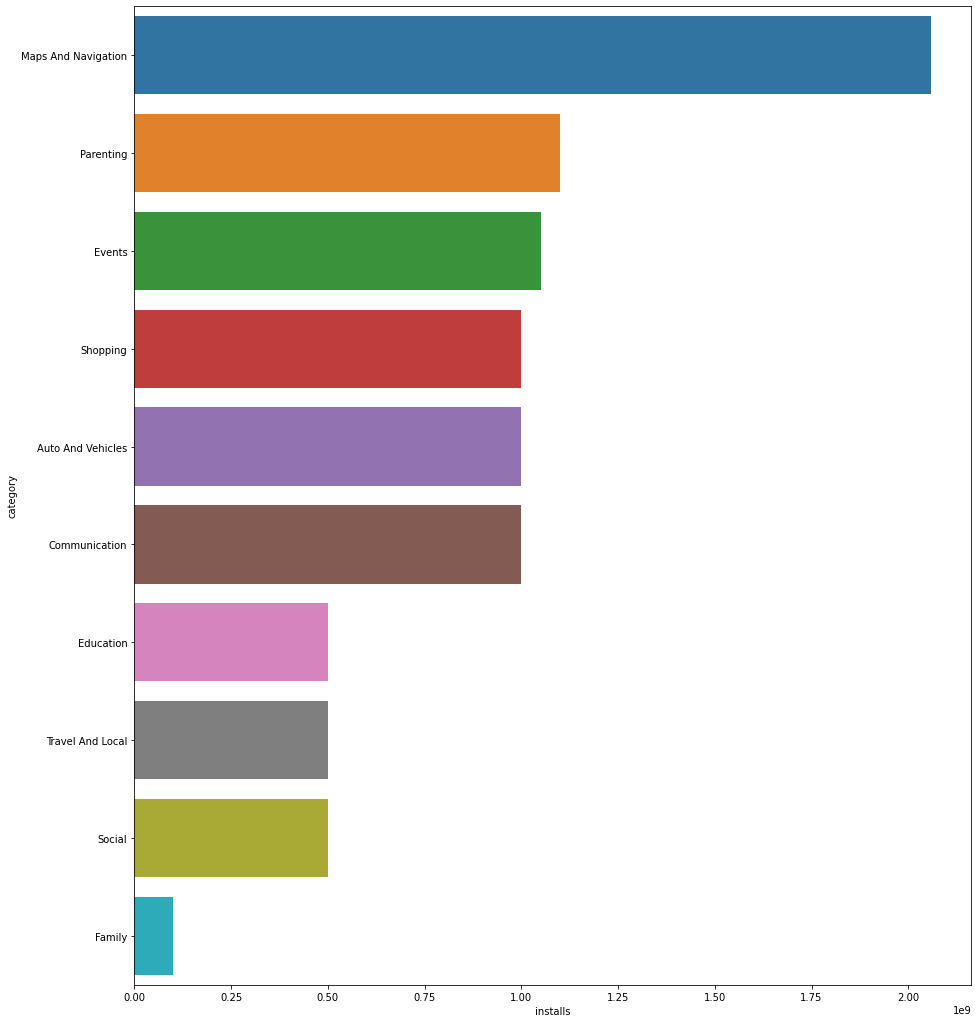

In [11]:
plt.figure(figsize=(15,18))
sns.barplot(data=top_categories, y='category', x='installs')

3. apakah ada jumlah pengaruh size app dengan jumlah download?

In [67]:
group_category
top_cat = df.sort_values('size_in_mb', ascending=False)[["app_name","size_in_mb","installs"]]
size_install = top_cat
size_install

,app_name,size_in_mb,installs
66,Namfix,246,100
16,Stim,243,5000
42,Zathin,240,50000000
61,Opela,237,1000
69,Fintone,235,1000
...,...,...,...
57,Tampflex,23,10
22,Fix San,22,0
58,Bitchip,21,1
39,Ventosanzap,9,1


4. apakah ada pengaruh reviews terhadap rating

In [56]:
df.sample(1)

,app_id,app_name,category,size_in_mb,installs,rating,reviews,app_version,last_updated
76,192,Flexidy,Social,150,1000,3.5,34376,8.0.2,2017-03-22


In [59]:
group_category
category_var2 = df.sort_values('reviews', ascending=False)[["app_name","rating","reviews"]]
review_rating = category_var2
review_rating

,app_name,rating,reviews
27,Zontrax,5.0,98112
20,Andalax,1.0,96524
78,Veribet,2.1,96347
79,Ronstring,3.3,96221
77,Toughjoyfax,1.3,91651
...,...,...,...
5,It,3.9,4513
43,Quo Lux,4.1,2209
11,Zamit,3.0,943
6,Home Ing,4.0,756


5. 